# pydicos tutorial

This notebook will run you through the basic data manipulations available with pydicos. Enjoy !

## dcs objects

DICOS objects in this library can be of 3 types : CT (3D volume), DX (2D image) and TDR (Treat Detection Report). Each object have different specific attributes that will be reviewed below.

### DX

DX are X-Ray images. Let's see how to properly create a DX object and .dcs file from a .png file

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import pydicos
from pyDICOS import CT, DX, TDR

In [3]:
imgpath = "samples/xrayimage.png"
img = 1000*cv2.imread(imgpath, -1)[:,:,0].astype(np.uint16)

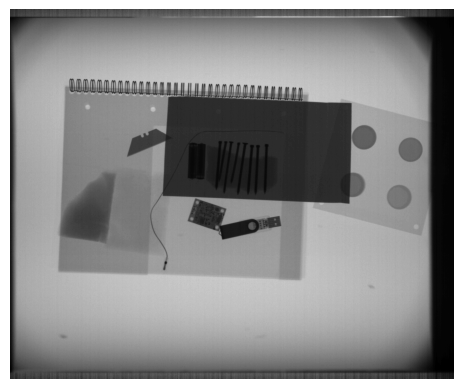

In [4]:
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [5]:
mydx = pydicos.DXLoader()
mydx.set_data(img)

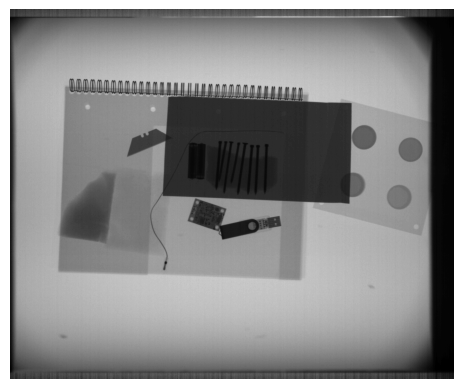

In [6]:
plt.imshow(mydx.get_data(), cmap="gray")
plt.axis("off")
plt.show()

### CT

DX are X-Ray computed tomography volumes. Let's see how to properly create a CT object and .dcs file from a .mhd file.

In [1]:
import skimage.io as io
from vedo import Volume

In [2]:
import pydicos
from pyDICOS import CT, DX, TDR
from pyDICOS import Volume as Vol_dicos

In [3]:
volpath = "samples/xrayvolume.mhd"
vol = Volume(io.imread(volpath, plugin='simpleitk'))

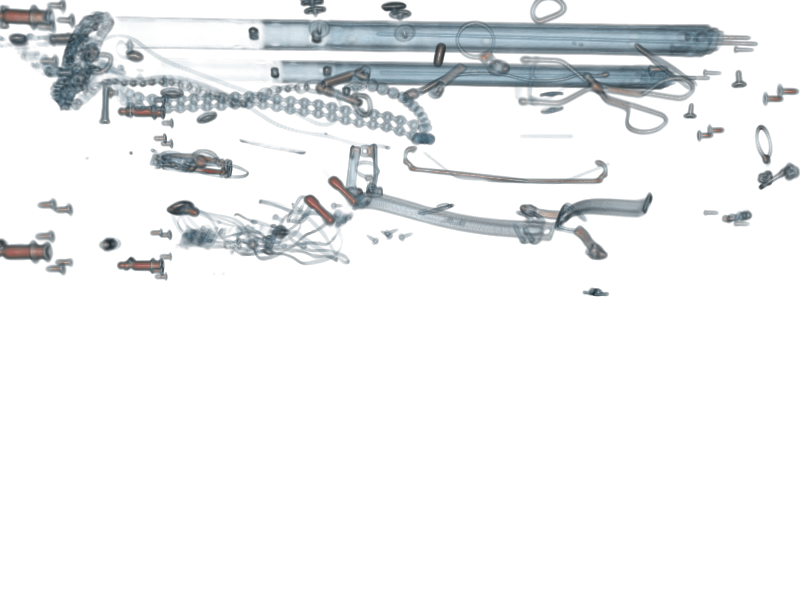

In [4]:
vol.show()

In [5]:
myct = pydicos.CTLoader()
data = [vol.tonumpy()]
myct.set_data([vol.tonumpy()])

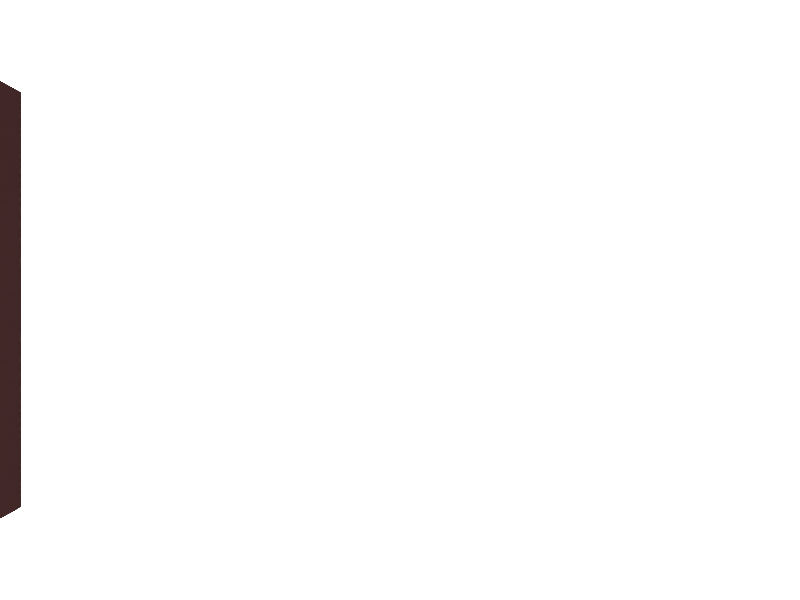

In [8]:
display = myct.get_data()
vol2 = Volume(display[0])
vol2.show()

In [9]:
import matplotlib.pyplot as plt

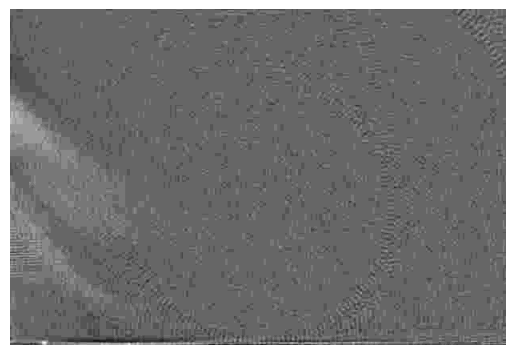

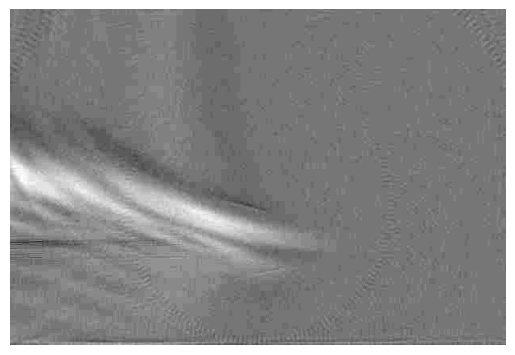

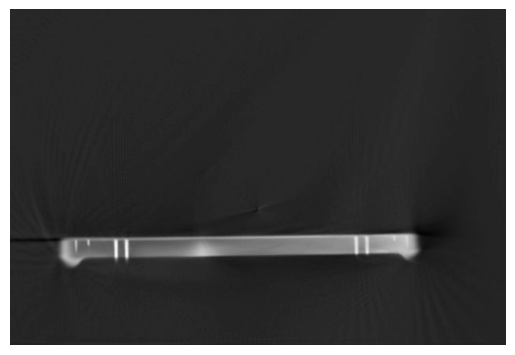

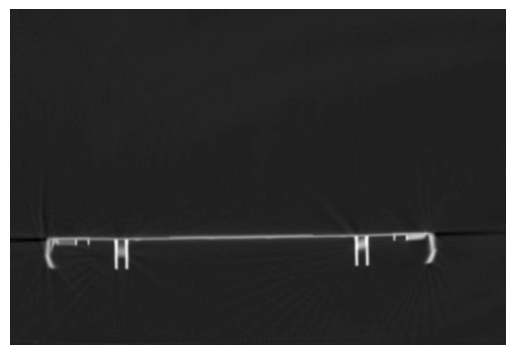

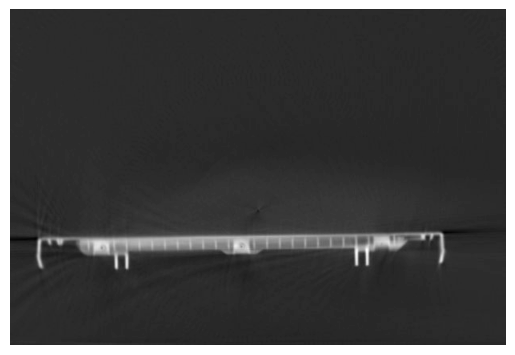

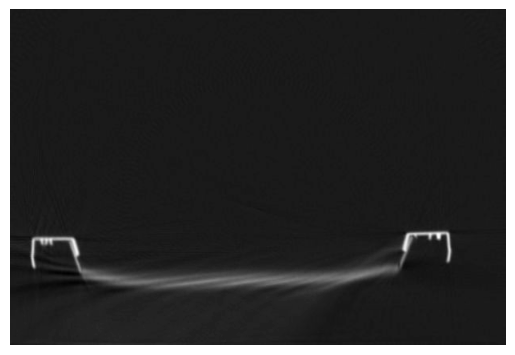

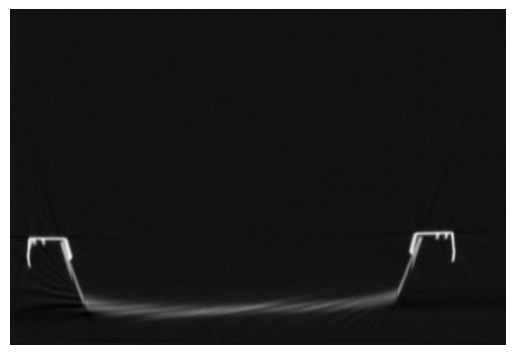

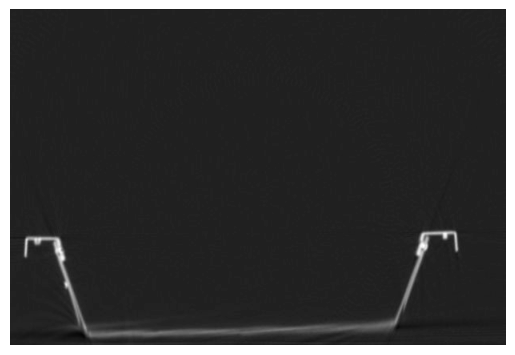

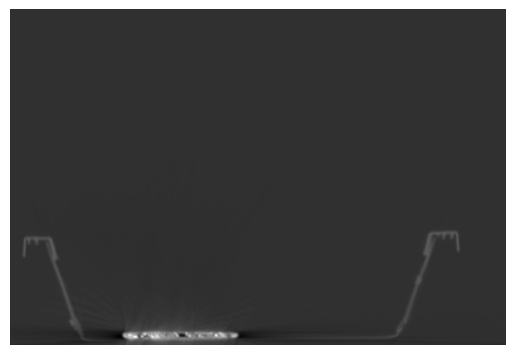

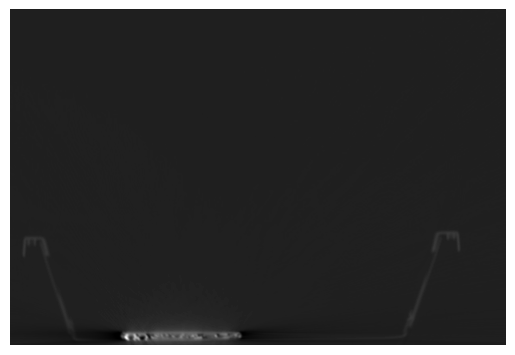

In [10]:
for i in range(10):
    plt.imshow(vol.tonumpy()[10*i], cmap="gray")
    plt.axis("off")
    plt.show()

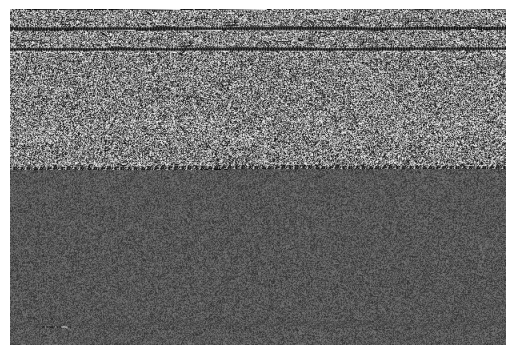

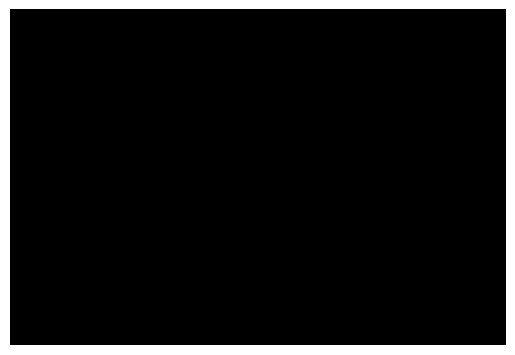

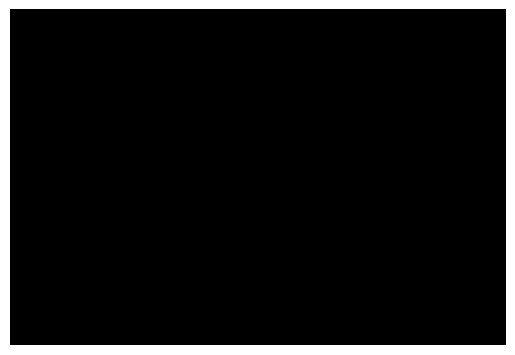

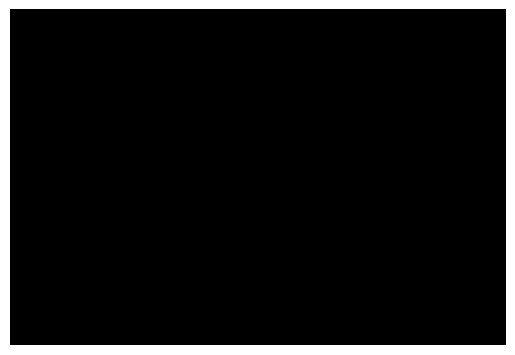

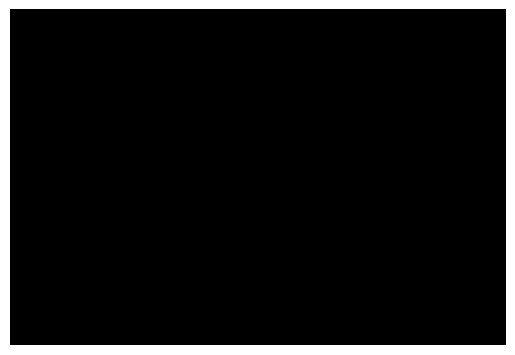

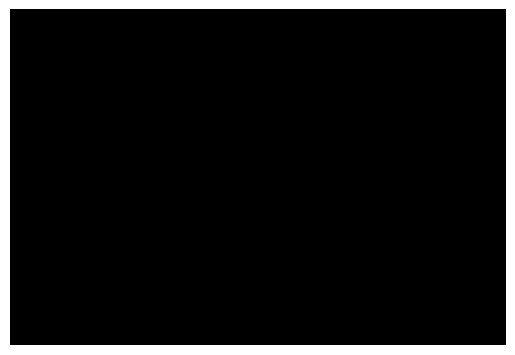

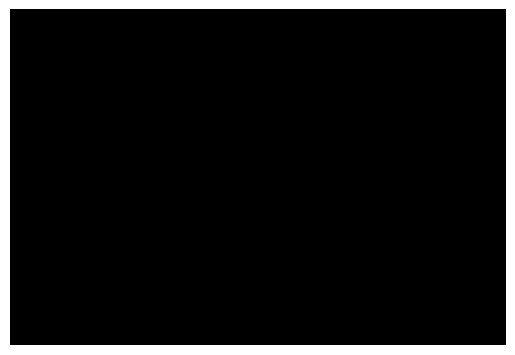

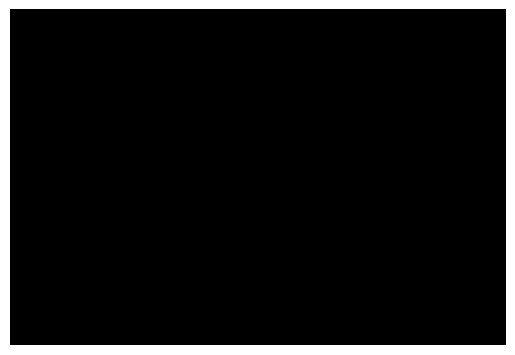

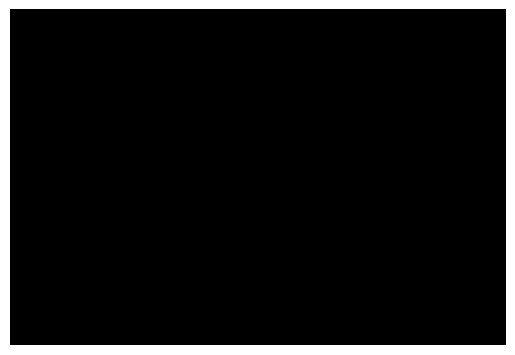

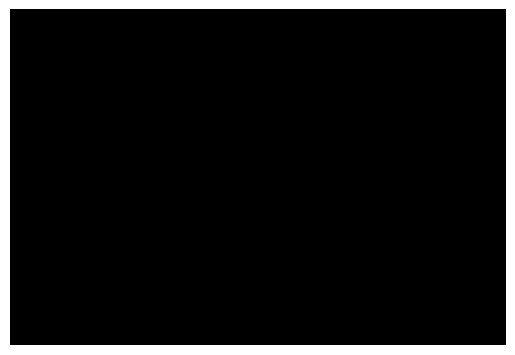

In [16]:
for i in range(10):
    plt.imshow(display[0][i*10], cmap="gray")
    plt.axis("off")
    plt.show()

### TDR

DX are detection report objects. Let's see how to properly create a TDR object and .dcs file from a model's detections.